### <h2 style='color:blue' align='center'>Top Businessman Image Classification Project<h2>

In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### Now how do you detect face and eyes?

In [3]:
img = cv2.imread('./test_image/MS_Zuckerberg_CloseUp.jpg')
img.shape

(1500, 1200, 3)

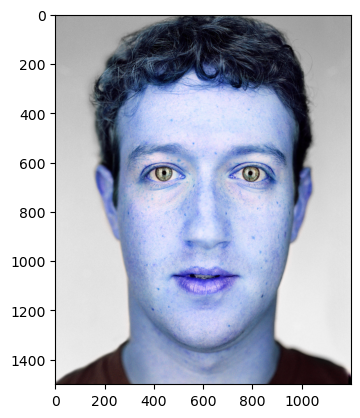

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1500, 1200)

In [6]:
gray

array([[165, 164, 165, ..., 163, 160, 155],
       [169, 166, 164, ..., 162, 159, 172],
       [166, 165, 166, ..., 163, 154, 162],
       ...,
       [106,  95,  88, ...,   1,   1,   1],
       [ 88,  79,  74, ...,   1,   1,   1],
       [ 75,  67,  64, ...,   1,   1,   1]], dtype=uint8)

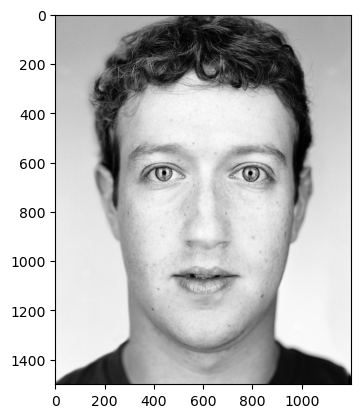

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[157, 310, 905, 905]])

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(157, 310, 905, 905)

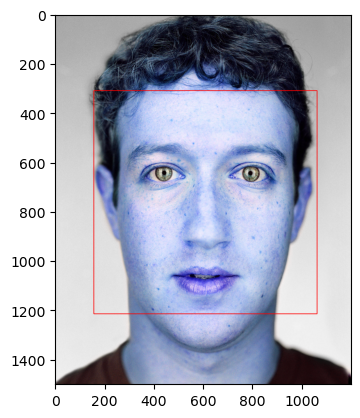

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

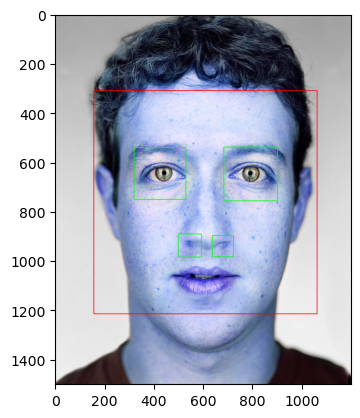

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

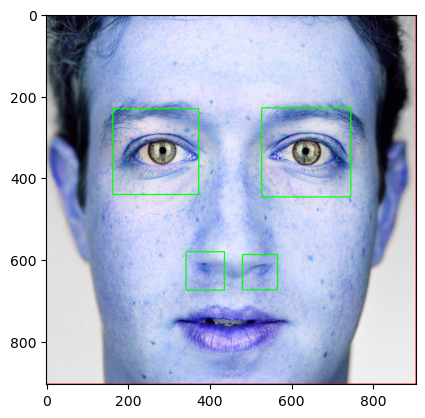

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

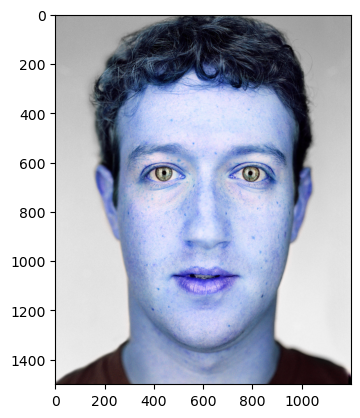

In [14]:
original_image = cv2.imread('./test_image/MS_Zuckerberg_CloseUp.jpg')
plt.imshow(original_image)

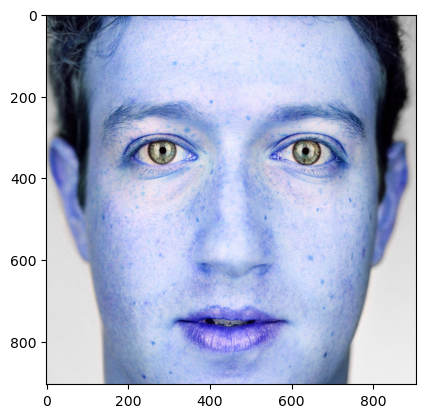

In [15]:
cropped_image = get_cropped_image_if_2_eyes('./test_image/MS_Zuckerberg_CloseUp.jpg')
plt.imshow(cropped_image)

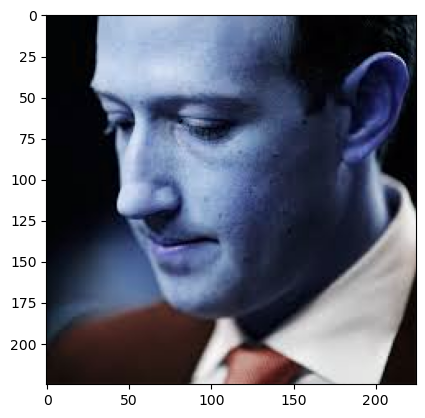

In [16]:
org_image_obstructed = cv2.imread('./test_image/7.jpg')
plt.imshow(org_image_obstructed)

In [17]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_image/7.jpg')
cropped_image_no_2_eyes

In [18]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./dataset/Bernard Arnault',
 './dataset/Bill Gates',
 './dataset/Elon Musk',
 './dataset/Jeff Bezos',
 './dataset/Mark Zuckerberg']

In [21]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if roi_color is None:
                continue
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1


Bernard Arnault
Generating cropped images in folder:  ./dataset/cropped/Bernard Arnault
Bill Gates
Generating cropped images in folder:  ./dataset/cropped/Bill Gates
Elon Musk
Generating cropped images in folder:  ./dataset/cropped/Elon Musk
Jeff Bezos
Generating cropped images in folder:  ./dataset/cropped/Jeff Bezos
Mark Zuckerberg
Generating cropped images in folder:  ./dataset/cropped/Mark Zuckerberg


In [23]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [24]:
cropped_img = np.array(roi_color)
cropped_img.shape

(842, 842, 3)

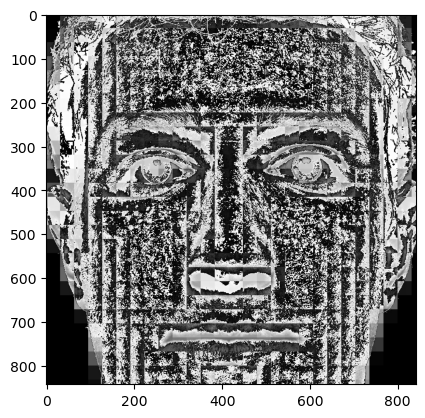

In [25]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [26]:
celebrity_file_names_dict

{'Bernard Arnault': ['./dataset/cropped/Bernard Arnault/Bernard Arnault1.png',
  './dataset/cropped/Bernard Arnault/Bernard Arnault2.png',
  './dataset/cropped/Bernard Arnault/Bernard Arnault3.png',
  './dataset/cropped/Bernard Arnault/Bernard Arnault4.png',
  './dataset/cropped/Bernard Arnault/Bernard Arnault5.png',
  './dataset/cropped/Bernard Arnault/Bernard Arnault6.png',
  './dataset/cropped/Bernard Arnault/Bernard Arnault7.png',
  './dataset/cropped/Bernard Arnault/Bernard Arnault8.png',
  './dataset/cropped/Bernard Arnault/Bernard Arnault9.png',
  './dataset/cropped/Bernard Arnault/Bernard Arnault10.png',
  './dataset/cropped/Bernard Arnault/Bernard Arnault11.png',
  './dataset/cropped/Bernard Arnault/Bernard Arnault12.png',
  './dataset/cropped/Bernard Arnault/Bernard Arnault13.png',
  './dataset/cropped/Bernard Arnault/Bernard Arnault14.png',
  './dataset/cropped/Bernard Arnault/Bernard Arnault15.png',
  './dataset/cropped/Bernard Arnault/Bernard Arnault16.png',
  './dataset/c

In [27]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Bernard Arnault': 0,
 'Bill Gates': 1,
 'Elon Musk': 2,
 'Jeff Bezos': 3,
 'Mark Zuckerberg': 4}

In [28]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [29]:
len(X[0])

4096

In [30]:
32*32*3 + 32*32

4096

In [31]:
X[0]

array([[108],
       [132],
       [157],
       ...,
       [  3],
       [  0],
       [193]], dtype=uint8)

In [32]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(185, 4096)

### Data cleaning process is done. Now we are ready to train our model

In [33]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear', C = 1))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8297872340425532

In [35]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       1.00      1.00      1.00         4
           2       0.73      0.73      0.73        11
           3       0.80      0.92      0.86        13
           4       0.89      0.80      0.84        10

    accuracy                           0.83        47
   macro avg       0.86      0.85      0.85        47
weighted avg       0.83      0.83      0.83        47



### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [36]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [37]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [0.01,0.1,1,10,100,1000],
            'svc__kernel': ['rbf','linear','polynomial','sigmoid']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10,50,100,200,500]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='saga',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [38]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.702899,"{'svc__C': 0.01, 'svc__kernel': 'linear'}"
1,random_forest,0.557971,{'randomforestclassifier__n_estimators': 500}
2,logistic_regression,0.688406,{'logisticregression__C': 1}


In [39]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=0.01, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=500))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(C=1, solver='saga'))])}

In [40]:
best_estimators['svm'].score(X_test,y_test)

0.8297872340425532

In [41]:
best_estimators['random_forest'].score(X_test,y_test)

0.6808510638297872

In [42]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7872340425531915

In [43]:
best_clf = best_estimators['logistic_regression']

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  0,  2],
       [ 0,  4,  0,  0,  0],
       [ 0,  1,  7,  2,  1],
       [ 1,  0,  0, 12,  0],
       [ 0,  0,  3,  0,  7]], dtype=int64)

Text(45.722222222222214, 0.5, 'Truth')

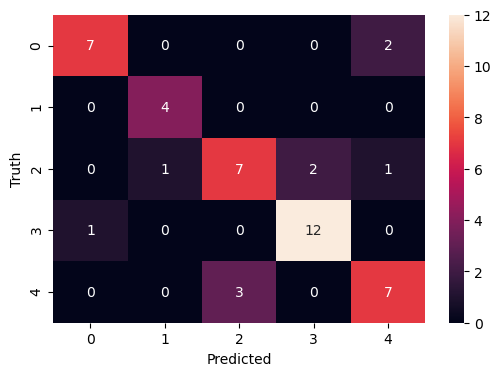

In [45]:
import seaborn as sn
plt.figure(figsize = (6,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')